# Process Mining

## Task 1:

### a) Loading the Data and Basic Statistics

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [2]:
#First import the necessary libraries
import pandas as pd
import pm4py
from pm4py.statistics.traces.generic.log import case_statistics
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('reimburse.csv')
df_formatted = pm4py.format_dataframe(df, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
eventlog = pm4py.convert_to_event_log(df_formatted)
eventlog

[{'attributes': {'concept:name': '0'}, 'events': [{'Timestamp': Timestamp('2020-06-01 06:00:00+0000', tz='UTC'), 'CaseId': 0, 'Activity': 'Online', 'ModelTime': 0, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': Timestamp('2020-06-01 06:00:00+0000', tz='UTC'), '@@index': 0}, '..', {'Timestamp': Timestamp('2020-06-03 09:52:18+0000', tz='UTC'), 'CaseId': 0, 'Activity': 'Pay', 'ModelTime': 186738, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Pay', 'time:timestamp': Timestamp('2020-06-03 09:52:18+0000', tz='UTC'), '@@index': 3}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'Timestamp': Timestamp('2022-02-05 20:00:11+0000', tz='UTC'), 'CaseId': 9999, 'Activity': 'Online', 'ModelTime': 53103611, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': Timestamp('2022-02-05 20:00:11+0000', tz='UTC'), '@@index': 47826}, '..', {'Timestamp': Timestamp('2022-02-16 11:56:24+0000', tz='UTC'), 'CaseId': 9999, 'Activity': 'P

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [5]:
print("Number of events: ",len(df))
print("Number of cases: ",len(eventlog))
print("Earliest timestamp: ",df['Timestamp'].min())
print("Latest timestamp: ",df['Timestamp'].max())
variants = pm4py.get_variants_as_tuples(eventlog)
print("Number of trace variants: ",len(variants.keys()))

Number of events:  47830
Number of cases:  10000
Earliest timestamp:  2020-06-01 06:00:00+00:00
Latest timestamp:  2022-03-10 12:14:51+00:00
Number of trace variants:  266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

In [6]:
#1
#groups the dataframe by the 'Timestamp' column, and counts the number of activities at each timestamp using the .agg() function. Reset the index of the resulting dataframe.
tmp = df.groupby('Timestamp').agg({'Activity': 'count'}).reset_index()
#print(tmp)
#filters the dataframe to only include timestamps where the count of activities is greater than 1.
tmp = tmp[tmp['Activity'] > 1]
#print(tmp)
#subtracts 1 from the 'Activity' column of the dataframe.
#tmp['Activity'] -= 1
#print(tmp['Activity'].max())
#calculates the total number of activities that occur at the same time by summing the 'Activity' column
same_time = tmp['Activity'].sum()
#print("1. There are ",same_time," events occuring almost at the same time")
print("1)",same_time, " events happening at the same time")

#2
# If num timestamps < num unique acts => that resource performs 2 activities at same time
#count the number of unique timestamps and the total number of activities for each resource.
tmp2 = df.groupby('Resource').agg({'Timestamp': 'nunique', 'Activity': 'count'}).reset_index()
#print(tmp2)
#filters the dataframe to only include resources where the number of unique timestamps is less than the total number of activities
tmp2 = tmp2[tmp2['Timestamp'] < tmp2['Activity']]
if len(tmp2)==0:
    print("2) No resources that complete two activities at the same time")
else:
    print("2) ",len(tmp2), " resources that complete two activities at the same time")

#3
#count the number of unique timestamps and the total number of activities for each case
tmp3 = df.groupby('CaseId').agg({'Timestamp': 'nunique', 'Activity': 'count'}).reset_index()
#only include cases where the number of unique timestamps is less than the total number of activities
tmp3 = tmp3[tmp3['Timestamp'] < tmp3['Activity']]
#print(tmp3)
if len(tmp3)==0:
    print("3) No cases in which two activities are executed at the same time")
else:
    print("3)",len(tmp3), " cases in which two activities are executed at the same time")

1) 1098  events happening at the same time
2) No resources that complete two activities at the same time
3) 21  cases in which two activities are executed at the same time


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

                      Timestamp  start  end
0     2020-06-01 06:00:00+00:00      1    0
1     2020-06-01 06:16:43+00:00      1    0
2     2020-06-01 08:21:49+00:00      1    0
3     2020-06-01 10:26:05+00:00      1    0
4     2020-06-01 11:05:47+00:00      1    0
...                         ...    ...  ...
19953 2022-03-10 11:13:16+00:00      0    1
19954 2022-03-10 11:15:02+00:00      0    1
19955 2022-03-10 11:15:58+00:00      0    1
19956 2022-03-10 11:23:12+00:00      0    1
19957 2022-03-10 12:14:51+00:00      0    1

[19958 rows x 3 columns]


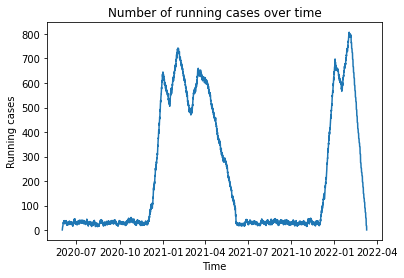

In [7]:
# Method: Select timestamps which is start or end of a case
# For each timestamp, assign a 'start' if a case starts at that timestamp
# assign a 'end' if a case ends at that timestamp
# The number of running cases at a timestamp is equal to
# #start - #end from the previous timestamps plus #start from current timestamp 
#find the minimum timestamp for each case and add new columns
mini = df.groupby('CaseId').agg({'Timestamp': 'min'}).reset_index()
mini['start'] = 1
mini['end'] = 0
#find the maximum timestamp for each case and add new columns
maxi = df.groupby('CaseId').agg({'Timestamp': 'max'}).reset_index()
maxi['start'] = 0
maxi['end'] = 1
concat = pd.concat([mini, maxi], axis=0)
#print(concat)
#sum the values of 'start' and 'end' columns
sum_concat = concat.groupby('Timestamp').agg({'start': sum, 'end': sum}).reset_index().sort_values('Timestamp')
print(sum_concat)
open_cases = [] 
prev = 0 
cur = sum_concat.iloc[0]['start'] 
open_cases.append(cur)
# The number of running cases at a timestamp is equal to #start - #end from the previous timestamps plus #start from current timestamp 
for i in range(1, len(sum_concat.index)):
    prev = cur
    prev_time = sum_concat.iloc[i-1]
    cur_time = sum_concat.iloc[i]
    cur += cur_time['start'] - prev_time['end']
    open_cases.append(cur)
plt.title('Number of running cases over time')
plt.xlabel('Time')
plt.ylabel('Running cases')
plt.plot(sum_concat['Timestamp'], open_cases)

### b) Discovery and Conformance Checking

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

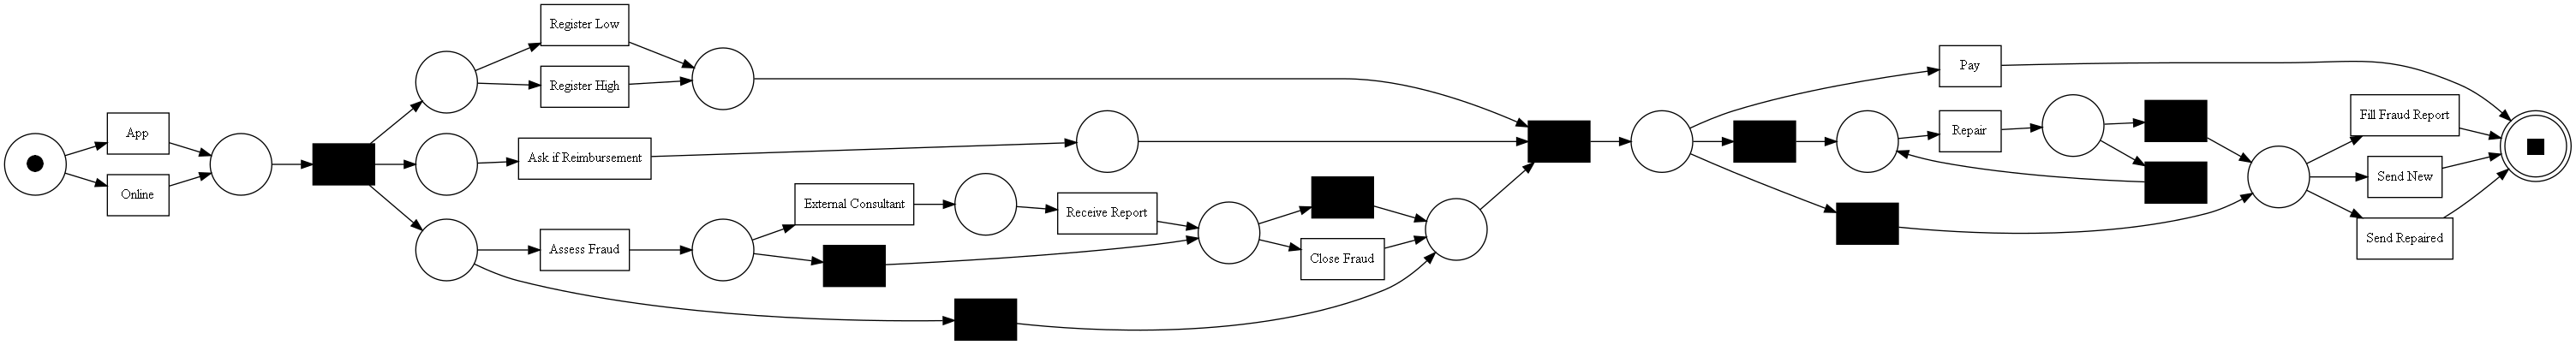

In [8]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(eventlog)
pm4py.view_petri_net(net, initial_marking, final_marking) 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [11]:
def petri_fitness(eventlog, net, initial_marking, final_marking):
    f =  token_based_replay.apply(eventlog, net, initial_marking, final_marking)
    m = 0
    c = 0
    r = 0
    p = 0
    for trace in f:
        m += trace['missing_tokens']
        c += trace['consumed_tokens']
        r += trace['remaining_tokens']
        p += trace['produced_tokens']
    fitness = 0.5*(1-m/c)+0.5*(1-r/p)
    return fitness

print(f"Fitness: {petri_fitness(eventlog, net, initial_marking, final_marking)}")

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

Fitness: 1.0


#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?

In [12]:
eventlog_low = pm4py.filter_event_attribute_values(eventlog, "concept:name", ["Register Low"], level="case", retain=True)

print("log_low has ",len(eventlog_low),"traces")

log_low has  7021 traces


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

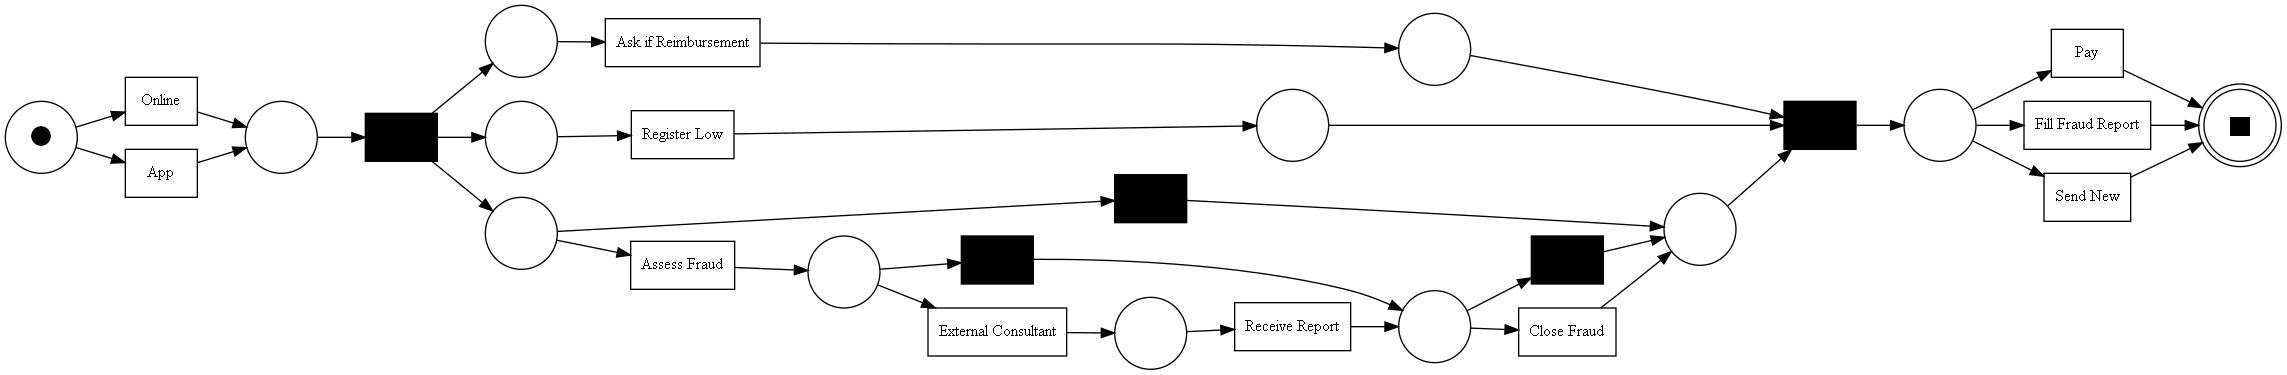

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

fitness: 1.0


In [13]:
net_low, initial_marking_low, final_marking_low = pm4py.discover_petri_net_inductive(eventlog_low)

pm4py.view_petri_net(net_low, initial_marking_low, final_marking_low)

print("fitness:",petri_fitness(eventlog_low, net_low, initial_marking_low, final_marking_low))

**Your answer:** *(Describe the difference between the two models here. About two sentences can be enough.*)

The log_low Petri net does not depict "Register High" as an exclusive choice between "Register Low", also Send Repaired is not an end activity and there is no loop of Repair before the end activity.

**Your answer**: *(Relate your observations to precision here.)*

As log_low constitutes a portion of log, the Petri net associated with log can simulate all traces permitted by the net of log_low, in addition to traces not present in log_low. This results in the net of log_low having a better level of accuracy.

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.


parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

[{'attributes': {'concept:name': '0'}, 'events': [{'Timestamp': datetime.datetime(2020, 6, 1, 6, 0, tzinfo=datetime.timezone.utc), 'CaseId': 0, 'Activity': 'Online', 'ModelTime': 0, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2020, 6, 1, 6, 0, tzinfo=datetime.timezone.utc), '@@index': 0}, '..', {'Timestamp': datetime.datetime(2020, 6, 3, 9, 52, 18, tzinfo=datetime.timezone.utc), 'CaseId': 0, 'Activity': 'Pay', 'ModelTime': 186738, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Finalize', 'time:timestamp': datetime.datetime(2020, 6, 3, 9, 52, 18, tzinfo=datetime.timezone.utc), '@@index': 3}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'Timestamp': datetime.datetime(2022, 2, 5, 20, 0, 11, tzinfo=datetime.timezone.utc), 'CaseId': 9999, 'Activity': 'Online', 'ModelTime': 53103611, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2022, 2, 5, 20, 0, 11, tzinfo=datetime.

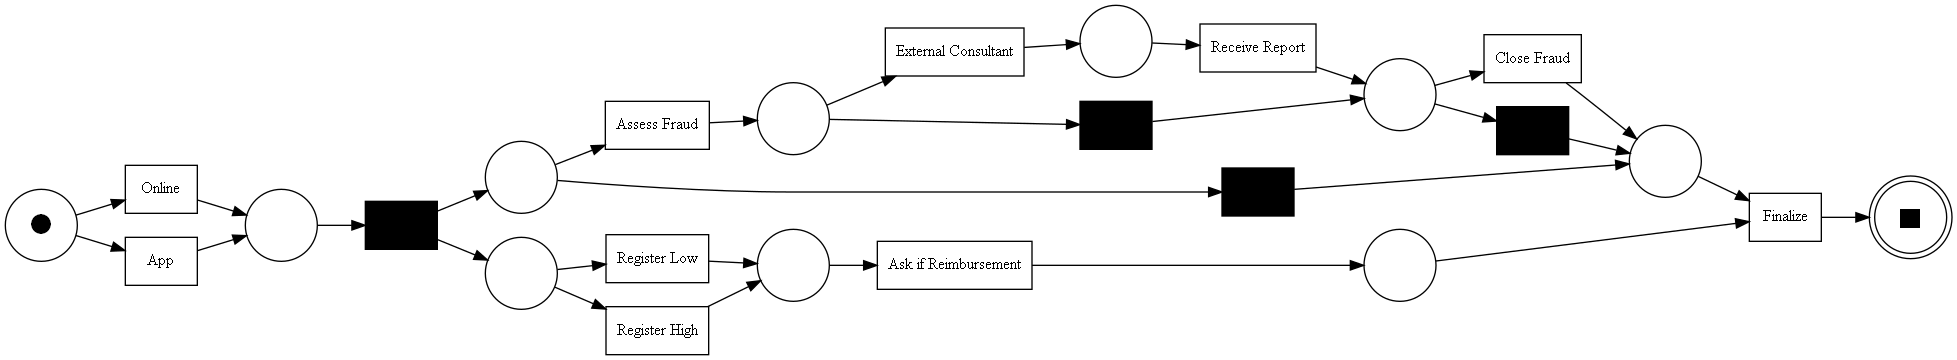

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

fitness: 0.9892890758104679


In [16]:
log_conf = pm4py.read_xes('./log_conf.xes')
print(log_conf)

# petri net
net_conf, initial_marking_conf, final_marking_conf = pm4py.read_pnml('./pn_conf.apnml')
pm4py.view_petri_net(net_conf, initial_marking_conf, final_marking_conf) 

#fitness
print("fitness:",petri_fitness(log_conf, net_conf, initial_marking_conf, final_marking_conf))

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [17]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, net_conf, initial_marking_conf, final_marking_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

replaying log with TBR, completed variants ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [18]:
pl = []
mi = []
con = []
rem = []
pro = []

for p in place_fitness.keys():
    pl.append(p)
    mi.append(place_fitness[p]['m'])
    con.append(place_fitness[p]['c'])
    rem.append(place_fitness[p]['r'])
    pro.append(place_fitness[p]['p'])

data = {
    'place': pl,
    'missing': mi,
    'consumed': con,
    'remaining': rem,
    'produced': pro
}
token_rep_df = pd.DataFrame(data=data)
token_rep_df

,place,missing,consumed,remaining,produced
0,n4,0,1917,0,1917
1,n5,0,10000,0,10000
2,n3,0,99,0,99
3,n7,0,10000,0,10000
4,n8,0,10000,0,10000
5,n10,0,10000,0,10000
6,n11,0,10000,0,10000
7,n1,899,10000,899,10000
8,n2,0,10000,0,10000
9,n6,0,10000,0,10000


#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [26]:
# your code
under = data['place'][7] 
#an unfitting trace

display(list(place_fitness[under]['underfed_traces'])[0][:])

[{'Timestamp': datetime.datetime(2021, 10, 9, 2, 45, 40, tzinfo=datetime.timezone.utc), 'CaseId': 7423, 'Activity': 'Online', 'ModelTime': 42756340, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2021, 10, 9, 2, 45, 40, tzinfo=datetime.timezone.utc), '@@index': 34247},
 {'Timestamp': datetime.datetime(2021, 10, 9, 10, 18, 2, tzinfo=datetime.timezone.utc), 'CaseId': 7423, 'Activity': 'Ask if Reimbursement', 'ModelTime': 42783482, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Ask if Reimbursement', 'time:timestamp': datetime.datetime(2021, 10, 9, 10, 18, 2, tzinfo=datetime.timezone.utc), '@@index': 34248},
 {'Timestamp': datetime.datetime(2021, 10, 9, 11, 44, 17, tzinfo=datetime.timezone.utc), 'CaseId': 7423, 'Activity': 'Register High', 'ModelTime': 42788657, 'Resource': '1', 'Brand': 'PEAR', 'concept:name': 'Register High', 'time:timestamp': datetime.datetime(2021, 10, 9, 11, 44, 17, tzinfo=datetime.timezone.utc), '@@index': 34249

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

Upon examining the unfitting traces, it was observed that the activity "Ask if Reimbursement" was performed before either "Register Low" or "Register High" were executed. In contrast, the Petri net model depicts the opposite sequence of events.

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

The table reveals that n1 is the place where missing and remaining tokens are found. According to the apnml file, n1 is the only post-place of "Register Low" or "Register High" and the only pre-place of "Ask if Reimbursement". Our analysis of the deviations indicates that during the token replays of the unfitting traces, "Ask if Reimbursement" is executed first, but as "Register Low"/"Register High" has not been executed yet, a missing token is placed on n1. Then one of "Register Low"/"Register High" is executed, which places a token on n1. This token is never consumed as "Ask if Reimbursement" is never executed more than once, resulting in a remaining token. This observation is also in line with the fact that the number of missing and remaining tokens in n1 are equal (both equal to 899).

### c) Analyzing Fraud

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


<BarContainer object of 3 artists>

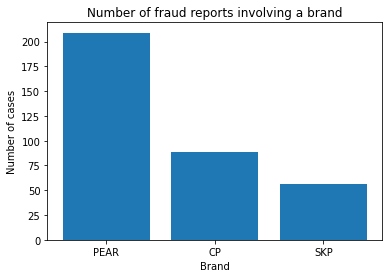

In [22]:
log_fraud = pm4py.filter_event_attribute_values(eventlog, "concept:name", ["Fill Fraud Report"], level="case", retain=True)
fraud_df = pm4py.convert_to_dataframe(log_fraud)

brand_counts = fraud_df.groupby("CaseId")["Brand"].first().value_counts()

fig, ax = plt.subplots()
ax.set_title("Number of fraud reports involving a brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Number of cases")
ax.bar(brand_counts.index, brand_counts)

**Your answer:** (*Describe the plot in two to three sentences.*)

The graph reveals that the brand PEAR is disproportionately represented in fraud reports compared to the other two brands. Nevertheless, it is important to remember that this representation may not necessarily imply a greater likelihood of fraud involvement with PEAR.

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned association rules. Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


<BarContainer object of 3 artists>

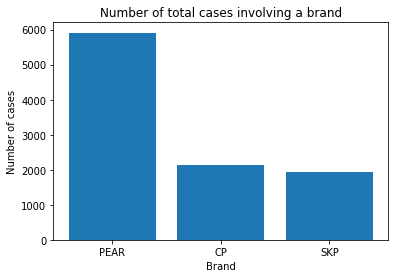

In [23]:
# code (for a short additional analysis)
brand_count_num = df.groupby("CaseId")["Brand"].first().reset_index()["Brand"].value_counts()

fig, ax = plt.subplots()
ax.set_title("Number of total cases involving a brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Number of cases")
ax.bar(brand_count_num.index, brand_count_num)

In [24]:
for b in brand_counts.index:
    print(f"Confidence of the association rule {b} => FRAUD is {brand_counts[b]/brand_count_num[b]}")

Confidence of the association rule PEAR => FRAUD is 0.035357807477584165
Confidence of the association rule CP => FRAUD is 0.041549953314659195
Confidence of the association rule SKP => FRAUD is 0.028762198253723677


**Your answer:** 

When analyzing the relationship between brands and fraud using association rules, it was found that the rule "CP => FRAUD" had the highest confidence. This indicates that, statistically speaking, the brand CP is more closely linked to fraud than the brand PEAR. Therefore, the information presented in the previous graph may not accurately reflect the likelihood of fraud involvement with different brands. However, it is worth noting that all the confidence values are low and the overall ratio of fraud cases is low, meaning that customers should not be overly concerned about the potential for fraud.